In [4]:
import pandas as pd
import re

weibo = pd.read_csv('Weibo.csv', encoding='utf-8')
weibo = pd.DataFrame(weibo, columns=['review'])
weibo = weibo.head(1000)

def clean_text(text):
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'\[\S+?\]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\u4e00-\u9fff]+', '', text)
    return text.strip()


weibo['review'] = weibo['review'].astype(str).apply(clean_text)

weibo


,review
0,更博了爆照了帅的呀就是越来越爱你生快傻缺
1,土耳其的事要认真对待否则直接开除很是细心酒店都全部OK啦
2,姑娘都羡慕你呢还有招财猫高兴
3,美
4,梦想有多大舞台就有多大
...,...
995,回复和爱美食懂美食的人分享体验感觉真好
996,一定要看啊请大家多多指教看起
997,这些啊转发微博
998,想起的片花对着喊快跑后面的巧克力要爆浆啦感谢大家晚安


In [5]:
from textblob import TextBlob
import pandas as pd

def analyze_text_sentiment_with_textblob(text):
    try:
        analysis = TextBlob(text)
        polarity = analysis.sentiment.polarity
        if polarity > 0:
            emotion = 'Positive'
        elif polarity < 0:
            emotion = 'Negative'
        else:
            emotion = 'Neutral'
        return emotion, abs(polarity)
    except Exception as e:
        return 'Error', 0.0

weibo[['sentiment', 'confidence']] = weibo['review'].apply(
    lambda x: pd.Series(analyze_text_sentiment_with_textblob(x))
)
weibo

,review,sentiment,confidence
0,更博了爆照了帅的呀就是越来越爱你生快傻缺,Neutral,0.0
1,土耳其的事要认真对待否则直接开除很是细心酒店都全部OK啦,Neutral,0.0
2,姑娘都羡慕你呢还有招财猫高兴,Neutral,0.0
3,美,Neutral,0.0
4,梦想有多大舞台就有多大,Neutral,0.0
...,...,...,...
995,回复和爱美食懂美食的人分享体验感觉真好,Neutral,0.0
996,一定要看啊请大家多多指教看起,Neutral,0.0
997,这些啊转发微博,Neutral,0.0
998,想起的片花对着喊快跑后面的巧克力要爆浆啦感谢大家晚安,Neutral,0.0


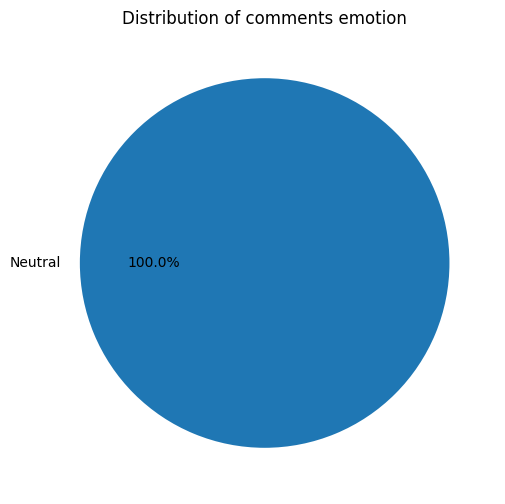

In [6]:
import matplotlib.pyplot as plt

sentiment_counts = weibo['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribution of comments emotion')
plt.show()

In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

def analyze_text_sentiment(text):
    try:
        result = sentiment_analysis(text)[0]
        label = result['label']
        score = result['score']
        if label == 'NEGATIVE':
            emotion = 'Negative'
        elif label == 'POSITIVE':
            emotion = 'Positive'
        else:
            emotion = 'Neutral'
        return emotion, score
    except Exception as e:
        return 'Wrong'

weibo[['sentiment', 'confidence']] = weibo['review'].apply(lambda x: pd.Series(analyze_text_sentiment(x)))

weibo

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Device set to use cpu


,review,sentiment,confidence
0,更博了爆照了帅的呀就是越来越爱你生快傻缺,Negative,0.934480
1,土耳其的事要认真对待否则直接开除很是细心酒店都全部OK啦,Negative,0.895083
2,姑娘都羡慕你呢还有招财猫高兴,Negative,0.936150
3,美,Positive,0.973424
4,梦想有多大舞台就有多大,Negative,0.890973
...,...,...,...
995,回复和爱美食懂美食的人分享体验感觉真好,Negative,0.915983
996,一定要看啊请大家多多指教看起,Negative,0.926464
997,这些啊转发微博,Negative,0.695560
998,想起的片花对着喊快跑后面的巧克力要爆浆啦感谢大家晚安,Negative,0.902183


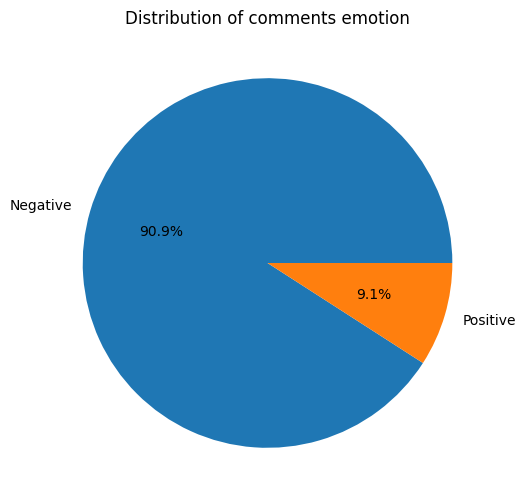

In [8]:
import matplotlib.pyplot as plt

sentiment_counts = weibo['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribution of comments emotion')
plt.show()


In [9]:
pip install snownlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760946 sha256=6e1a3801aa5c7973fa9b313b7cfbc494bc7191c89a36caf185e6245ab9e733a3
  Stored in directory: /root/.cache/pip/wheels/43/f3/70/8990fc249efeb396007766676706f71dd3d1ca3c023ce522ce
Successfully built snownlp


In [19]:
from snownlp import SnowNLP
import pandas as pd

def analyze_text_sentiment_with_snownlp(text):
    try:
        s = SnowNLP(text)
        score = s.sentiments
        if score > 0.6:
            emotion = 'Positive'
        elif score < 0.4:
            emotion = 'Negative'
        else:
            emotion = 'Neutral'
        return emotion, score
    except Exception as e:
        return 'Neutral'

weibo[['sentiment', 'confidence']] = weibo['review'].apply(
    lambda x: pd.Series(analyze_text_sentiment_with_snownlp(x))
)
weibo


,review,sentiment,confidence
0,更博了爆照了帅的呀就是越来越爱你生快傻缺,Negative,0.203206
1,土耳其的事要认真对待否则直接开除很是细心酒店都全部OK啦,Positive,0.870020
2,姑娘都羡慕你呢还有招财猫高兴,Positive,0.958328
3,美,Positive,0.857909
4,梦想有多大舞台就有多大,Positive,0.933256
...,...,...,...
995,回复和爱美食懂美食的人分享体验感觉真好,Positive,0.981201
996,一定要看啊请大家多多指教看起,Neutral,0.482071
997,这些啊转发微博,Positive,0.643891
998,想起的片花对着喊快跑后面的巧克力要爆浆啦感谢大家晚安,Positive,0.958613


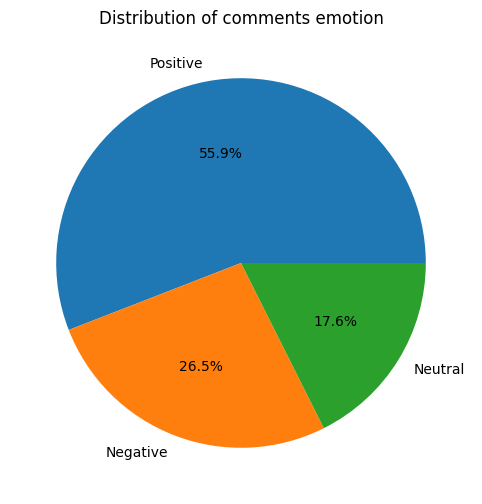

In [20]:
import matplotlib.pyplot as plt

sentiment_counts = weibo['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribution of comments emotion')
plt.show()
